# Problem 1
### Obtaining a dataset

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame


dataset: DataFrame =  pd.read_csv("./train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Problem 2
### Investigating the dataset itself

This dataset comprises a wide range of features related to residential properties.The dataset includes 79 explanatory variables describing  every aspect of residential homes such asphysical characteristics, construction details, amenities, and sales information in Ames, Iowa. The primary focus is on predicting the sale price of properties, making it suitable for regression analysis. Key features include:

- **Physical Characteristics**: lot size, linear feet of street connected to the property, general shape of the property, flatness of the property, slope of the property, physical locations within city limits.
  
- **Construction Details**: building class, original construction date, remodel date, type of roof, roof material, exterior covering, masonry veneer type and area, exterior material quality and condition, type of foundation, basement height and condition, basement finish quality and area, unfinished square feet of basement area, above-grade living area square feet, number of floors and rooms, home functionality rating.

- **Amenities**: type of road access, type of alley access, type of utilities available, lot configuration, presence and quality of fireplace, garage location, year built and condition, garage size and area, presence and quality of pool, fence quality, miscellaneous features, wood deck area, porch area.

- **Sales Information**: month and year of sale, type of sale, condition of sale.



# Problem 3
### Checking the data

In [2]:
#See what each feature is about. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

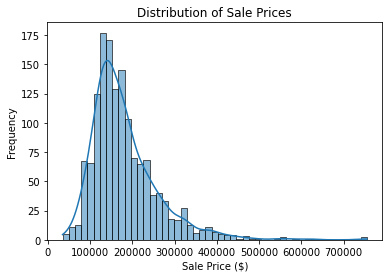

In [6]:
#Check which column is the target variable this time.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

target_variable = "SalePrice"
sns.histplot(data=dataset, x=target_variable, kde=True)
plt.xlabel("Sale Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Prices")
plt.show()

In [7]:
#Display the mean, standard deviation, and quartiles of the feature values at once.
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Problem 4
### Dealing with missing values

In [14]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


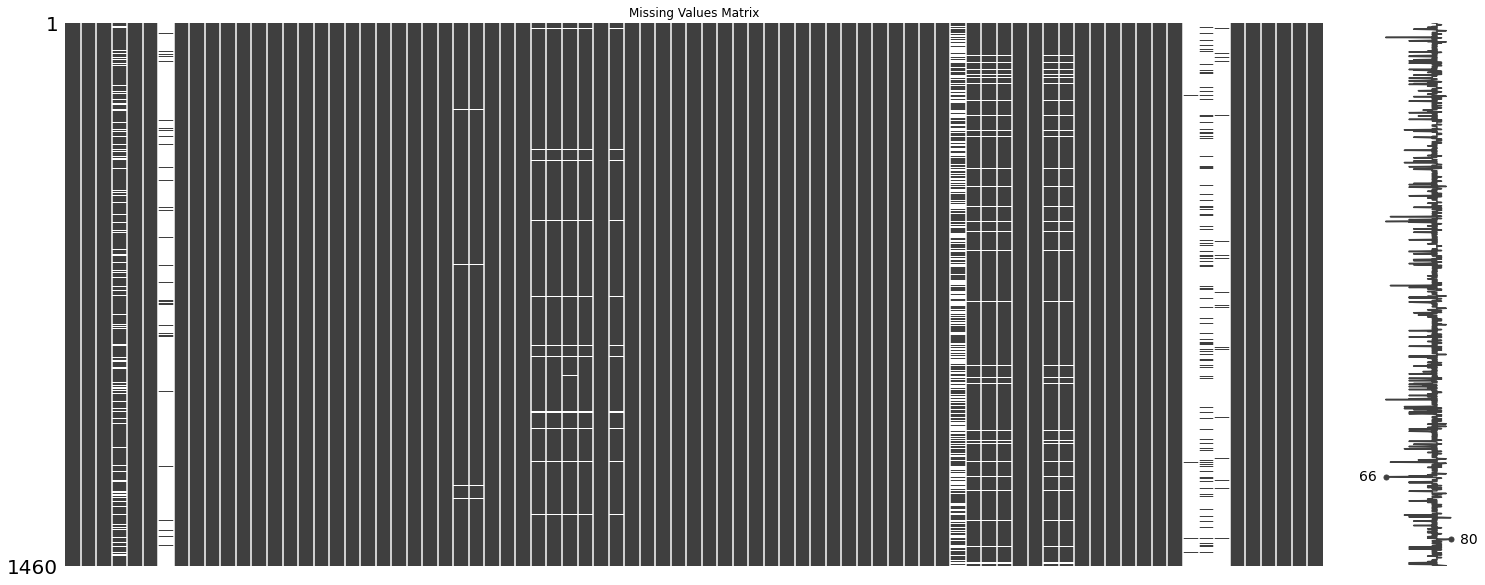

In [4]:
#Check for missing values for each feature.
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(dataset)
plt.show()

In [6]:
# Calculate the percentage of missing values for each feature
import pandas as pd


missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100
total_missing_values = dataset.isnull().sum()
missing_info = pd.DataFrame({
    'feature': missing_percentage.index,
    'total': total_missing_values.values,
    'missing_ratio': missing_percentage.values,
})
missing_info_sorted = missing_info.sort_values(by='missing_ratio', ascending=False)
print(missing_info_sorted)


        feature  total  missing_ratio
72       PoolQC   1453      99.520548
74  MiscFeature   1406      96.301370
6         Alley   1369      93.767123
73        Fence   1179      80.753425
57  FireplaceQu    690      47.260274
..          ...    ...            ...
27    ExterQual      0       0.000000
24  Exterior2nd      0       0.000000
23  Exterior1st      0       0.000000
22     RoofMatl      0       0.000000
80    SalePrice      0       0.000000

[81 rows x 3 columns]


In [7]:
#Delete features (columns) that have 5 or more missing values.
dataset = dataset.drop(columns=dataset.columns[dataset.isnull().sum() >= 5])
dataset

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


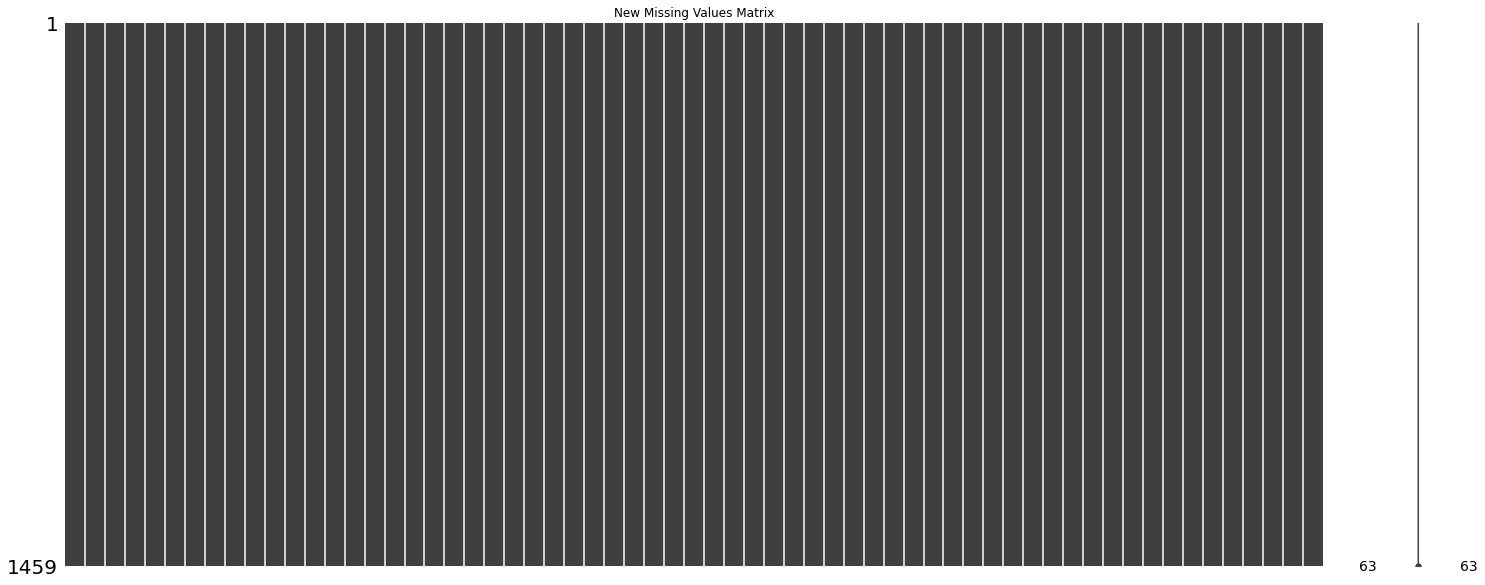

In [9]:
#Samples (rows) with missing values are deleted from the data from which features with 5 or more missing values have been deleted.
import missingno as msno
import matplotlib.pyplot as plt


threshold = 5
dataset = dataset.dropna(axis=1, thresh=len(dataset) - threshold + 1)
dataset = dataset.dropna()
msno.matrix(dataset)
plt.title("New Missing Values Matrix")
plt.show()


# Problem 5
### Researching terminology

**Kurtosis**:
   - Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.
   - It quantifies the relative "peakedness" or "flatness" of a distribution compared to the normal distribution (which has a kurtosis of 3).
   - A positive kurtosis indicates a distribution with heavier tails than the normal distribution, resulting in more extreme values (leptokurtic).
   - A negative kurtosis indicates a distribution with lighter tails than the normal distribution, resulting in fewer extreme values (platykurtic).
   - A kurtosis of exactly 3 (excess kurtosis of 0) is termed mesokurtic, indicating a distribution similar to the normal distribution.
   - Kurtosis is calculated using the fourth central moment of the data distribution.

**Skewness**:
   - Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable.
   - It quantifies the degree to which the distribution is "lopsided" or skewed to one side.
   - Positive skewness indicates a distribution with a tail extending to the right (right-skewed or positively skewed).
   - Negative skewness indicates a distribution with a tail extending to the left (left-skewed or negatively skewed).
   - A skewness of 0 indicates a symmetric distribution.
   - Skewness is calculated using the third central moment of the data distribution.



# Problem 6
### Confirming distribution

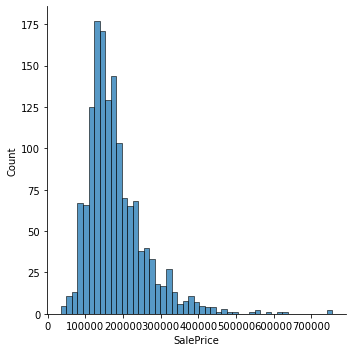

In [11]:
import seaborn as sns
sns.displot(dataset['SalePrice']);

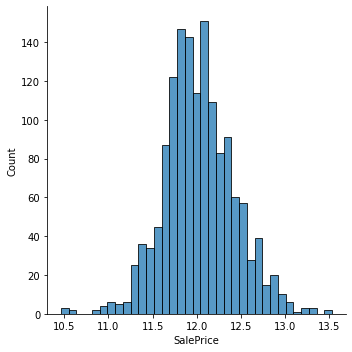

In [12]:
#Perform a logarithmic transformation on the objective variable.
sns.displot(np.log(dataset['SalePrice']));

In [14]:
print("Kurtosis value:\nBefore log: ", dataset['SalePrice'].kurt(), "\nAfter log: ", np.log(dataset['SalePrice']).kurt())
print("\n")
print("Skewness value:\nBefore log: ", dataset['SalePrice'].skew(), "\nAfter log: ", np.log(dataset['SalePrice']).skew())


Kurtosis value:
Before log:  6.529263049673958 
After log:  0.806927847502148


Skewness value:
Before log:  1.8819429948035529 
After log:  0.12131775882415026


# Problem 7
###  Confirming the correlation coefficient

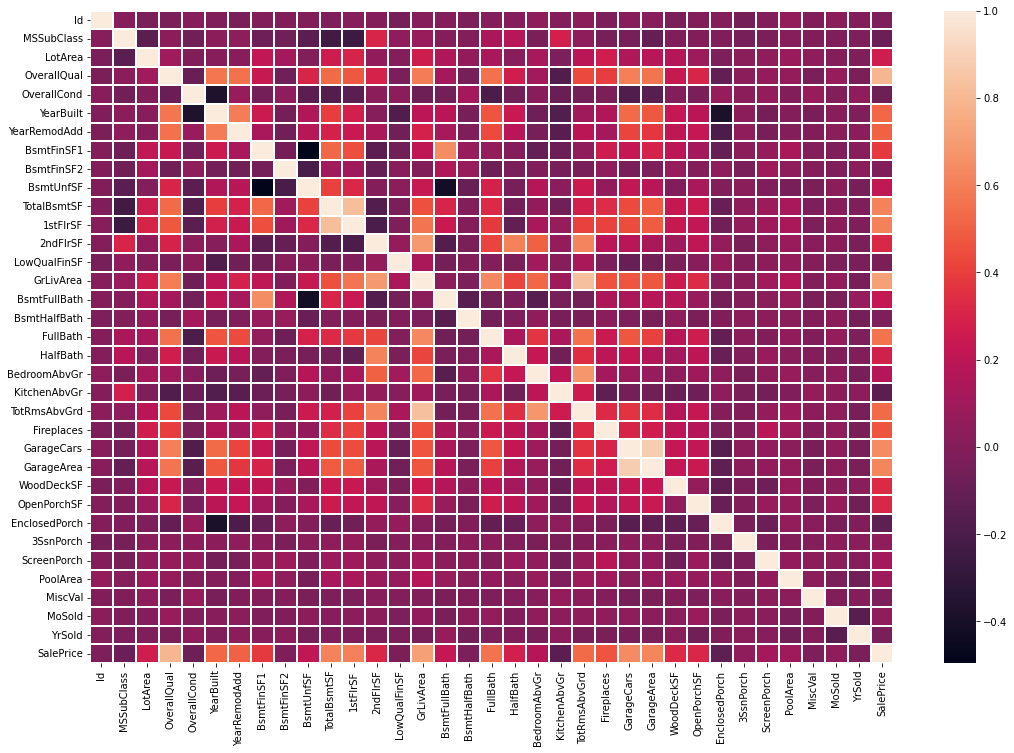

In [19]:
#Create a heat map of the correlation coefficient matrix and find the relationships with high correlation coefficients.
corr = dataset.corr()
corr
plt.subplots(figsize=(18, 12))
sns.heatmap(corr, linewidth=0.1)
plt.show()

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
              OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
OverallQual      1.000000   0.593021    0.600991    0.561980     0.537523   
GrLivArea        0.593021   1.000000    0.467321    0.468971     0.455001   
GarageCars       0.600991   0.467321    1.000000    0.882613     0.435279   
GarageArea       0.561980   0.468971    0.882613    1.000000     0.486719   
TotalBsmtSF      0.537523   0.455001    0.435279    0.486719     1.000000   
1stFlrSF         0.475933   0.566084    0.439726    0.489741     0.819393   
FullBath         0.551267   0.630283    0.469619    0.405944     0.324886   
TotRmsAbvGrd     0.427720   0.825576    0.362248    0.337915     0.286125   
YearBuilt        0.573334   0.199286    0.537866    0.479460     0.393159   
YearRemodAdd     0.551605   0.287677    0.420573    0.372012     0.292546   

           

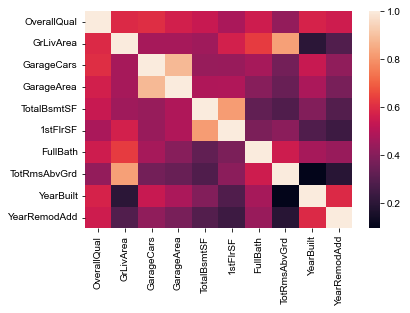

In [20]:
#Select 10 features that have a high correlation with the target variable, and create a correlation coefficient matrix heat map for these.
saleprice_cor = corr['SalePrice']
top10_corr = saleprice_cor.sort_values(axis=0, ascending=False)[1:11] #The first place is SalePrice - SalePrice (1.00) so we takes from the 2nd one
top10_lst = top10_corr.index.values.tolist()
print(top10_lst)

#Get the correlation matrix from 10 highest one
corr_top10 = corr[top10_lst].T[top10_lst]
print(corr_top10)

#Get the heatmap
sns.heatmap(corr_top10)
sns.set()


In [21]:
#Find 3 combinations of the 10 selected features that have high correlation coefficients with each other.
high_corr_dict = {}
for i in range(len(corr_top10)):
    for j in range(i):
        high_corr_dict[corr_top10.columns[i] + ', ' + corr_top10.index[j]] = corr_top10.iloc[i, j]
high_corr_dict = dict(sorted(high_corr_dict.items(), key=lambda item: -item[1]))
pd.DataFrame(high_corr_dict, index=['correlation']).T[:3]


,correlation
"GarageArea, GarageCars",0.882613
"TotRmsAbvGrd, GrLivArea",0.825576
"1stFlrSF, TotalBsmtSF",0.819393
